In [ ]:
pip install tensorflow keras opencv-python matplotlib

In [ ]:
import cv2
import imghdr
import os

In [ ]:
# dir = "drive/MyDrive/dataset_merek_botol"
dir = "drive/MyDrive/new_botol_dataset"

In [ ]:
image_ext = ['jpeg', 'jpg', 'png', 'bmp']

In [ ]:
for img_class in os.listdir(dir):
  for img in os.listdir(os.path.join(dir, img_class)):
    img_path = os.path.join(dir, img_class, img)
    try:
      img = cv2.imread(img_path)
      tip = imghdr.what(img_path)
      if tip not in image_ext:
        print('image not in ext list')
        os.remove(img_path)
    except Exception as e:
      print('issue')

image not in ext list
image not in ext list
image not in ext list
image not in ext list
image not in ext list
image not in ext list
image not in ext list
image not in ext list
image not in ext list
image not in ext list
image not in ext list
image not in ext list
image not in ext list
image not in ext list
image not in ext list
image not in ext list
image not in ext list
image not in ext list
image not in ext list
image not in ext list
image not in ext list
image not in ext list
image not in ext list
image not in ext list
image not in ext list
image not in ext list
image not in ext list
image not in ext list
image not in ext list
image not in ext list
image not in ext list
image not in ext list
image not in ext list
image not in ext list
image not in ext list
image not in ext list
image not in ext list
image not in ext list


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from keras.utils import image_dataset_from_directory
from matplotlib import pyplot as plt

In [ ]:
# data = image_dataset_from_directory(dir)

Found 265 files belonging to 3 classes.


In [ ]:
# data_iterator = data.as_numpy_iterator()

In [ ]:
# data_iterator

In [ ]:
# batch = data_iterator.next()

In [ ]:
# batch[0][:2]

array([[[[5.31613770e+01, 7.71613770e+01, 1.25161377e+02],
         [4.18636475e+01, 6.58636475e+01, 1.13863647e+02],
         [4.37000732e+01, 6.77000732e+01, 1.15700073e+02],
         ...,
         [2.24958191e+02, 2.21958191e+02, 2.06958191e+02],
         [2.26953125e+02, 2.23953125e+02, 2.08953125e+02],
         [2.26953125e+02, 2.23953125e+02, 2.08953125e+02]],

        [[4.57680054e+01, 6.97680054e+01, 1.17768005e+02],
         [4.02590942e+01, 6.42590942e+01, 1.12259094e+02],
         [4.44713745e+01, 6.84713745e+01, 1.16471375e+02],
         ...,
         [2.23016052e+02, 2.20016052e+02, 2.05016052e+02],
         [2.28570312e+02, 2.25570312e+02, 2.10570312e+02],
         [2.28570312e+02, 2.25570312e+02, 2.10570312e+02]],

        [[5.45064697e+01, 7.85064697e+01, 1.26506470e+02],
         [4.58648682e+01, 6.87134399e+01, 1.16713440e+02],
         [4.13093872e+01, 6.53093872e+01, 1.13309387e+02],
         ...,
         [2.26914062e+02, 2.23914062e+02, 2.08914062e+02],
         [

In [ ]:
CATEGORIES = ["aqua", "cleo", "lemineral"]
IMG_SIZE = 32
NUM_CLASSES = 3

In [ ]:
import os
training_data = []

for category in CATEGORIES:
    path = os.path.join(dir, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([new_array, class_num])
        except Exception as e:
            pass

In [ ]:
import random
random.shuffle(training_data)

In [ ]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y).reshape(-1, 1)

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

y_train = to_categorical(y_train, num_classes=NUM_CLASSES)
y_test = to_categorical(y_test, num_classes=NUM_CLASSES)

In [ ]:
y_train

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

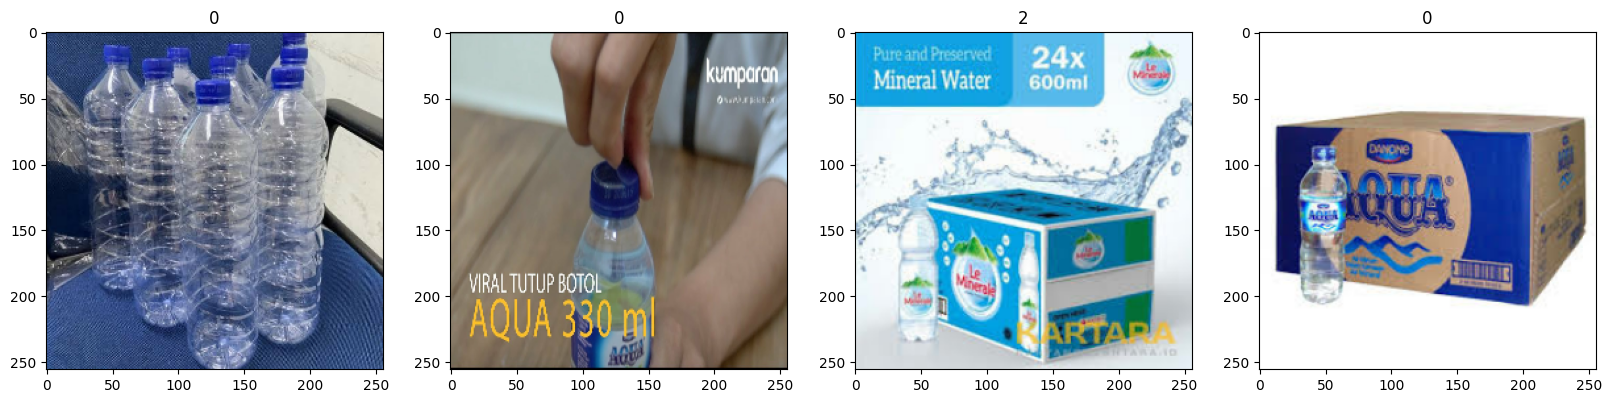

In [ ]:
# fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx, img in enumerate(batch[0][:4]):
#   ax[idx].imshow(img.astype(int))
#   ax[idx].title.set_text(batch[1][idx])

In [ ]:
from keras.layers import Input, Dense, Flatten, Conv2D, BatchNormalization, Dropout, Activation, ReLU, Softmax
from keras.models import Model
from keras.optimizers import Adam

In [ ]:
input_layer = Input((32, 32, 3))

In [ ]:
x = Conv2D(
    filters=16,
    kernel_size=3,
    strides=1,
    padding="same"
)(input_layer)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Conv2D(
    filters=16,
    kernel_size=3,
    strides=2,
    padding="same"
)(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Conv2D(
    filters=32,
    kernel_size=3,
    strides=1,
    padding="same"
)(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Conv2D(
    filters=32,
    kernel_size=3,
    strides=2,
    padding="same"
)(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Flatten()(x)

x = Dense(units=64)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(units=NUM_CLASSES)(x)
output_layer = Softmax()(x)

In [ ]:
model = Model(input_layer, output_layer)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 16)        64        
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 16)        64        
 chNormalization)                                            

In [ ]:
opt = Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

In [ ]:
model_train = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100,
    shuffle=True
)

Epoch 1/100
61/61 [==============================] - 6s 54ms/step - loss: 0.5479 - accuracy: 0.7594 - val_loss: 1.3749 - val_accuracy: 0.2645
Epoch 2/100
61/61 [==============================] - 3s 48ms/step - loss: 0.2404 - accuracy: 0.9110 - val_loss: 1.1603 - val_accuracy: 0.4483
Epoch 3/100
61/61 [==============================] - 3s 56ms/step - loss: 0.1444 - accuracy: 0.9519 - val_loss: 0.7699 - val_accuracy: 0.7913
Epoch 4/100
61/61 [==============================] - 5s 87ms/step - loss: 0.1242 - accuracy: 0.9628 - val_loss: 0.7620 - val_accuracy: 0.6612
Epoch 5/100
61/61 [==============================] - 3s 48ms/step - loss: 0.1034 - accuracy: 0.9710 - val_loss: 0.3149 - val_accuracy: 0.9050
Epoch 6/100
61/61 [==============================] - 3s 48ms/step - loss: 0.0661 - accuracy: 0.9829 - val_loss: 0.1971 - val_accuracy: 0.9483
Epoch 7/100
61/61 [==============================] - 3s 49ms/step - loss: 0.0622 - accuracy: 0.9824 - val_loss: 0.1577 - val_accuracy: 0.9504
Epoch 

In [ ]:
model.evaluate(X_test, y_test, batch_size=32)

16/16 [==============================] - 0s 14ms/step - loss: 0.3285 - accuracy: 0.9256


[0.3284682333469391, 0.9256198406219482]

In [ ]:
CLASSES = np.array(['aqua', 'cleo', 'lemineral'])

preds = model.predict(X_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

16/16 [==============================] - 1s 25ms/step


Text(0.5, 23.52222222222222, 'Actual label')

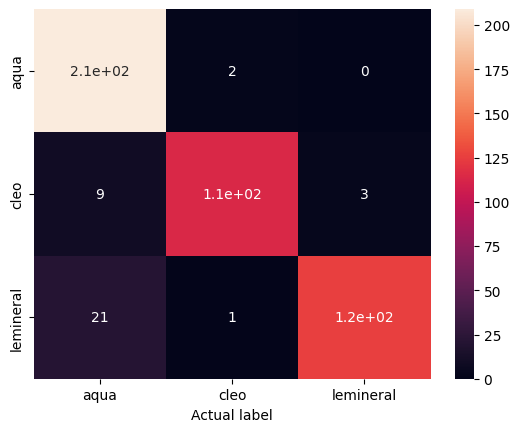

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

c_mtx = confusion_matrix(actual_single, preds_single)
table_cfmtx = pd.DataFrame(c_mtx, index=CLASSES, columns=CLASSES)

sns.heatmap(table_cfmtx, annot=True)
plt.xlabel("Predicted label")
plt.xlabel("Actual label")

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

img = load_img("cleo-dari bawah.jpg", target_size=(32, 32))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

cleo_test = model.predict(x)

classes_x = np.argmax(cleo_test, axis=1)
if classes_x == 0:
  fruit = "aqua"
elif classes_x == 1:
   fruit = "cleo"
elif classes_x == 2:
   fruit = "lemineral"
else:
   fruit = "None"

print(fruit)

FileNotFoundError: [Errno 2] No such file or directory: 'cleo-dari bawah.jpg'

In [ ]:
from matplotlib import pyplot as plt

loss = model_train.history["loss"]
val_loss = model_train.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend(loc='best')
plt.show()

TypeError: 'History' object is not subscriptable

In [ ]:
from matplotlib import pyplot as plt

accuracy = model_train.history["accuracy"]
val_accuracy = model_train.history["val_accuracy"]

epochs = range(1, len(loss) + 1)

plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend(loc='best')
plt.show()

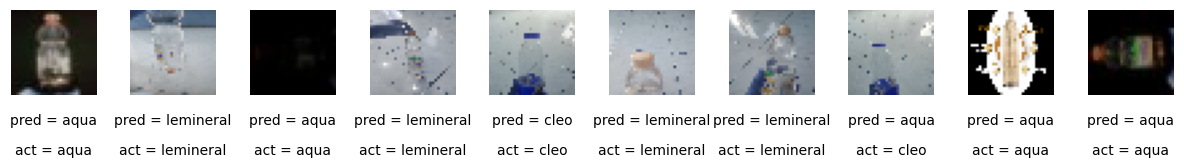

In [ ]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(X_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = X_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)


In [ ]:
model.save("ecopc_b3.h5")

NameError: name 'model' is not defined

In [ ]:
import numpy as np

model = load_model=('ecopc_b3.h5')

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

img = load_img("aqua1.jpg", target_size=(32, 32))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

cleo_test = model.predict(x)

classes_x = np.argmax(cleo_test, axis=1)
if classes_x == 0:
  fruit = "aqua"
elif classes_x == 1:
   fruit = "cleo"
elif classes_x == 2:
   fruit = "lemineral"
else:
   fruit = "None"

print(fruit)

AttributeError: 'str' object has no attribute 'predict'